In [1]:
import os, sys, glob, math, csv

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
BFA = np.load('BFA.npy')
len(BFA)

237286

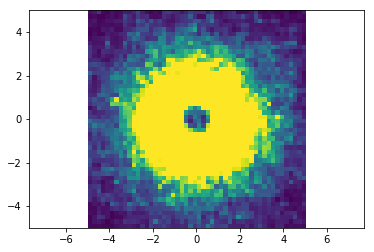

In [3]:
nbs = np.zeros((2,4*len(BFA)))
thresh = 0

k = 0

    
for t in range(len(BFA)):    
    for i in range(4):
        relx = BFA[t,i+7]-BFA[t,1]
        rely = BFA[t,i+11]-BFA[t,2]
        nbs[0,k] = relx
        nbs[1,k] = rely
        k+=1
nbs = nbs[:,0:k]
    
xmin=-5
xmax=5
plt.hist2d(nbs[0],nbs[1],range=([[xmin, xmax], [xmin, xmax]]),bins=50,vmin=0,vmax=500)
plt.axis('equal')
plt.show()

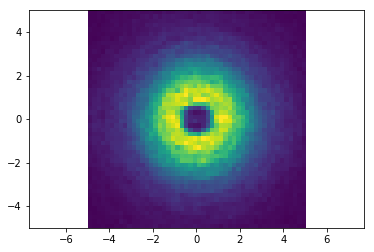

In [12]:
#BFA = np.load('BFA.npy')
#0 - id, 1-xf, 2-yf, 3-vx, 4-vy, 5-ax, 6-ay, 7,8,9,10-xns,-11,12,13,14-yns
nbs = np.zeros((2,4*len(BFA)))
thresh = 0.00

k = 0

    
for t in range(len(BFA)):    
    accels = np.sqrt(BFA[t,5]**2+BFA[t,6]**2)
    if accels<thresh:
        continue
    angle = np.arctan2(BFA[t,4],BFA[t,3])

    c, s = np.cos(angle), -np.sin(angle)
    R = np.array(((c,-s), (s, c)))
    
    for i in range(4):
        relx = BFA[t,i+7]-BFA[t,1]
        rely = BFA[t,i+11]-BFA[t,2]
        rotx = c*relx - s*rely
        roty = s*relx + c*rely
        nbs[0,k] = rotx
        nbs[1,k] = roty
        k+=1
nbs = nbs[:,0:k]
    
xmin=-5
xmax=5
plt.hist2d(nbs[0],nbs[1],range=([[xmin, xmax], [xmin, xmax]]),bins=50,vmin=0,vmax=1550)
plt.axis('equal')
plt.show()

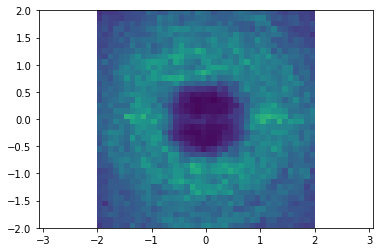

In [44]:
#BFA = np.load('BFA.npy')
#0 - id, 1-xf, 2-yf, 3-vx, 4-vy, 5-ax, 6-ay, 7,8,9,10-xns,-11,12,13,14-yns
nbs = np.zeros((2,4*len(BFA)))
thresh = 0.005

k = 0

    
for t in range(len(BFA)):    
    accels = np.sqrt(BFA[t,3]**2+BFA[t,4]**2)
    if accels<thresh:
        continue
    angle = np.arctan2(BFA[t,4],BFA[t,3])

    c, s = np.cos(angle), -np.sin(angle)
    R = np.array(((c,-s), (s, c)))
    
    for i in range(4):
        relx = BFA[t,i+7]-BFA[t,1]
        rely = BFA[t,i+11]-BFA[t,2]
        rotx = c*relx - s*rely
        roty = s*relx + c*rely
        nbs[0,k] = rotx
        nbs[1,k] = roty
        k+=1
nbs = nbs[:,0:k]
    
xmin=-2
xmax=2
plt.hist2d(nbs[0],nbs[1],range=([[xmin, xmax], [xmin, xmax]]),bins=40,vmin=0,vmax=500)
plt.axis('equal')
plt.show()

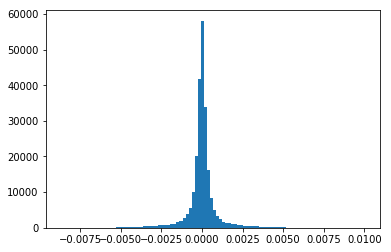

In [73]:
accels = BFA[:,5]#**2+BFA[:,6]**2)
plt.hist(accels,bins=100)
plt.show()

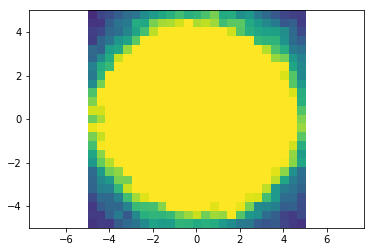

In [41]:
#BFA = np.load('BFA.npy')
#0 - id, 1-xf, 2-yf, 3-vx, 4-vy, 5-ax, 6-ay, 7,8,9,10-xns,-11,12,13,14-yns
nbs = np.zeros((2,4*len(BFA)))
push = np.zeros((4*len(BFA)))
allaccels = np.sqrt(BFA[:,5]**2+BFA[:,6]**2)

thresh = 0.00

k = 0

    
for t in range(len(BFA)):    
    accels = np.sqrt(BFA[t,5]**2+BFA[t,6]**2)
    if accels<thresh:
        continue
    angle = np.arctan2(BFA[t,4],BFA[t,3])

    c, s = np.cos(angle), -np.sin(angle)
    R = np.array(((c,-s), (s, c)))
    
    for i in range(4):
        relx = BFA[t,i+7]-BFA[t,1]
        rely = BFA[t,i+11]-BFA[t,2]
        rotx = c*relx - s*rely
        roty = s*relx + c*rely
        nbs[0,k] = rotx
        nbs[1,k] = roty
        #if rotx<0:
        push[k] = BFA[t,3]
        k+=1
nbs = nbs[:,0:k]
    
xmin=-5
xmax=5
plt.hist2d(nbs[0],nbs[1],range=([[xmin, xmax], [xmin, xmax]]),bins=25,vmin=0,vmax=500)
plt.axis('equal')
plt.show()

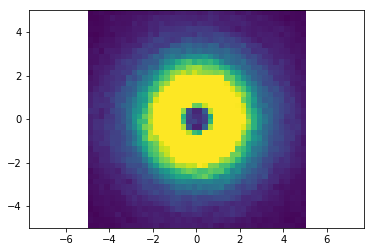

In [77]:
#BFA = np.load('BFA.npy')
#0 - id, 1-xf, 2-yf, 3-vx, 4-vy, 5-ax, 6-ay, 7,8,9,10-xns,-11,12,13,14-yns
nbs = np.zeros((2,4*len(BFA)))
Z = np.zeros((4*len(BFA)))
thresh = 0.00

k = 0

    
for t in range(len(BFA)):    
    accels = np.sqrt(BFA[t,3]**2+BFA[t,4]**2)
    if accels<thresh:
        continue
    angle = np.arctan2(BFA[t,4],BFA[t,3])

    c, s = np.cos(angle), -np.sin(angle)
    R = np.array(((c,-s), (s, c)))
    
    for i in range(4):
        relx = BFA[t,i+7]-BFA[t,1]
        rely = BFA[t,i+11]-BFA[t,2]
        rotx = c*relx - s*rely
        roty = s*relx + c*rely
        nbs[0,k] = rotx
        nbs[1,k] = roty
        dist = ((rotx**2)+(roty**2)**0.5)
        Z[k] = BFA[t,5]#*rotx/dist + BFA[t,6]*roty/dist
        k+=1
nbs = nbs[:,0:k]
Z = Z[0:k]
    
xmin=-5
xmax=5
plt.hist2d(nbs[0],nbs[1],range=([[xmin, xmax], [xmin, xmax]]),bins=40,vmin=0,vmax=1500)
plt.axis('equal')
plt.show()

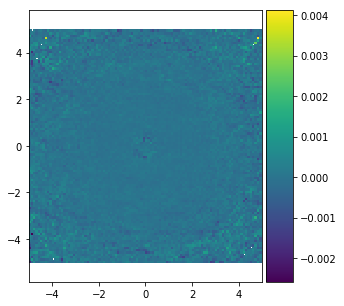

In [80]:
from scipy import stats

H, xedges, yedges, binnumber = stats.binned_statistic_2d(nbs[0,:], nbs[1,:], values = Z, statistic='mean' ,range=([[xmin, xmax], [xmin, xmax]]), bins = [100, 100])


XX, YY = np.meshgrid(xedges, yedges)


fig = plt.figure(figsize = (5,5))
ax1=plt.subplot(111)
plot1 = ax1.pcolormesh(XX,YY,H.T)
cbar = plt.colorbar(plot1,ax=ax1, pad = .015, aspect=10)
plt.axis('equal')

plt.show()



In [50]:
nbs[0,:].shape

(642172,)

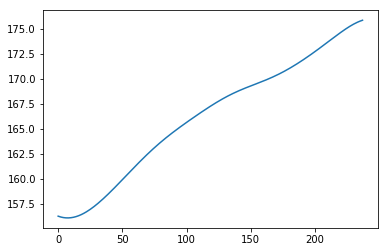

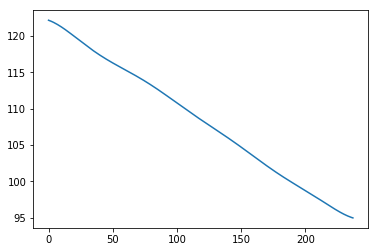

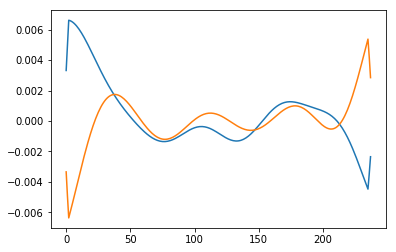

In [85]:

for w in range(1000):
    xpos = BFA[BFA[:,0]==w,1]
    ypos = BFA[BFA[:,0]==w,2]
    xv = BFA[BFA[:,0]==w,5]
    yv = BFA[BFA[:,0]==w,6]
    dist = ((xpos[0]-xpos[-1])**2+(ypos[0]-ypos[-1])**2)**0.5
    if dist>30:
        plt.plot(xpos)
        
        
        
        #plt.axis('equal')
        plt.show()
        plt.figure()
        plt.plot(ypos)
        
        #plt.axis('equal')
        plt.show()
        plt.plot(xv)
        plt.plot(yv)
        plt.show()
        
        
        break

In [16]:
xpos

array([102.40668123, 103.17155645, 104.61493943, 100.64124134,
       100.67733576, 101.94129397, 102.9737596 , 101.58333745,
       101.48637401, 100.25720189, 103.83919129, 102.4077454 ,
       105.79027251, 106.51746609, 105.76886917, 110.76219282,
       108.3030355 , 106.33848416, 107.81260465, 105.53211038,
       104.52885975, 105.64784796, 106.05052701, 108.40969353,
       108.49290443, 108.66452039, 108.07549387, 109.33271387,
       109.13911714, 108.2885391 , 108.15469283, 108.98207478,
       106.11034597, 104.90895917, 105.73144397, 105.87981034,
       105.25248403, 102.2422799 , 102.05610173, 102.00736727,
       104.12057055, 104.83076373, 105.81859583, 106.03298127,
       104.41889144, 107.49148668, 109.06511345, 107.26605963,
       107.06261913, 103.79326917, 106.49063519, 105.72219819,
       105.65732588, 107.00047849, 105.02003345, 106.37963176,
       100.69774884,  99.70347406, 101.42634438, 102.41075436,
       102.48688714, 103.21634459, 103.28176725, 102.57